<a href="https://colab.research.google.com/github/anne1111/income-level-prediction/blob/master/exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

%matplotlib inline

## Problem Statement

The objective of this project is to create binary classification models to predict whether an individual’s annual income exceeds USD50K/year based on US demographic census data such as age, gender, occupation and country of origin. This could help retailers target their advertising according to the predicted income level of their audience, or serve as an inference study to understand factors contributing to a higher income. Intuitively, I would expect to see occupation, working hours per week and gender, with men earning more than women, to be the features with highest predictive values in this study.

Data source: https://archive.ics.uci.edu/ml/datasets/adult - UCI Machine Learning Repository

### Data Dictionary

One dependent variable Income, 14 independent variables 

Variable | Description | Type of Variable
---| ---| ---
Income | >50K, <=50K | categorical
Age | Age | categorical
Workclass | Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked  | categorical
Fnlwgt | sampling weight  | continuous
Marital-status | Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse | categorical
Education | Highest level of education achieved | categorical
Education-num | number of years in education, corresponds to education level | continuous
Occupation | Occupation, 14 levels | categorical
Relationship | Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried (describes relationship to householder) | categorical
Race | White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black | categorical
Sex | female, male | categorical
Capital-gain| Income from capital assets | continuous
Capital-loss| Loss from capital assets | continuous
Hours-per-week| Hours worked per week | continuous
Native-country| Country of origin | continuous

The dataset and a more detailed description is available at https://archive.ics.uci.edu/ml/datasets/adult

A detailed definition of Relationship feature used in US Census data is available here:
http://webapp1.dlib.indiana.edu/virtual_disk_library/index.cgi/4291881/FID1867/acs_html/html/meth_doc/datadef/hhld_rel.htm

### Links to related resources

http://blog.pangyanhan.com/posts/2017-02-15-analysis-of-the-adult-data-set-from-uci-machine-learning-repository.ipynb.html, https://www.kaggle.com/wenruliu/adult-income-dataset, http://scg.sdsu.edu/dataset-adult_r/, https://www.valentinmihov.com/2015/04/17/adult-income-data-set/, https://www.knowbigdata.com/blog/predicting-income-level-analytics-casestudy-r, https://www.mis.nsysu.edu.tw/db-book/DMProject2007Spring/6/project.pdf, https://cseweb.ucsd.edu/~jmcauley/cse190/reports/sp15/048.pdf

## Load data

The dataset has been divided into train and test datasets with the following dimensions:

48842 instances, mix of continuous and discrete (train=32561, test=16281)
45222 if instances with unknown values are removed (train=30162, test=15060)

For the purpose of data analysis and cleaning, both datasets will be merged into one dataframe.

In [33]:
df1 = pd.read_csv("adult.data",names = ["Age", "Workclass", "Fnlwgt", "Education", "Education-Num", "Marital-Status", "Occupation","Relationship", "Race", "Sex", "Capital-Gain", "Capital-Loss", "Hours-per-week", "Native-country", "Income"], skipinitialspace=True)
df2 = pd.read_csv("adult.test",names = ["Age", "Workclass", "Fnlwgt", "Education", "Education-Num", "Marital-Status", "Occupation","Relationship", "Race", "Sex", "Capital-Gain", "Capital-Loss", "Hours-per-week", "Native-country", "Income"], skipinitialspace=True, header=1)
df2['Income'] = df2.Income.replace({'<=50K.': '<=50K', '>50K.':'>50K'}) # replace full stops after 50K in test dataset

frames = [df1, df2]
df_raw = pd.concat(frames)
df_raw.head(5)

,Age,Workclass,Fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Check that the shape of the dataframe matches dataset description. The number is one lower than reported above due to the removal of a header row in test dataset

In [34]:
df_raw.shape

(48841, 15)

## Check for missing data

According to the notes available at UCI Machine Learning Repository, the original datasets had missing values labeled with a question mark (?). Replacing these with NaN shows the missing values are spread out over three columns, Workclass, Occupation and Native-country.

In [35]:
df_missing = df_raw.replace('?', np.nan)
df_missing.isnull().sum()

Age                  0
Workclass         2799
Fnlwgt               0
Education            0
Education-Num        0
Marital-Status       0
Occupation        2809
Relationship         0
Race                 0
Sex                  0
Capital-Gain         0
Capital-Loss         0
Hours-per-week       0
Native-country     857
Income               0
dtype: int64

The test results documented were done after removing all missing values, so I'm removing these as well.

In [36]:
df_cleaned = df_missing.dropna(axis=0, how='any')
df_cleaned.shape

(45221, 15)

## Remove features

The feature 'fnlwgt' is a sampling weight assigned to each person to describe their socio-economic characteristics. The dataset description states that while people who have similar characteristics should in theory have similar weights, the sample is actually a collection of state samples each with its own probability of selection, so this statement only applies within state. As this feature only describes the data collection process I will exclude it from this analysis.

In [0]:
df_cleaned = df_cleaned.drop(['Fnlwgt'], axis=1)

In [38]:
df_cleaned.columns # Confirming it's gone

Index(['Age', 'Workclass', 'Education', 'Education-Num', 'Marital-Status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-Gain',
       'Capital-Loss', 'Hours-per-week', 'Native-country', 'Income'],
      dtype='object')

## Explore continuous variables

In [39]:
df_cleaned.describe()

,Age,Education-Num,Capital-Gain,Capital-Loss,Hours-per-week
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548241,10.118529,1101.454700,88.597377,40.938038
std,13.217863,2.552867,7506.511295,404.960355,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


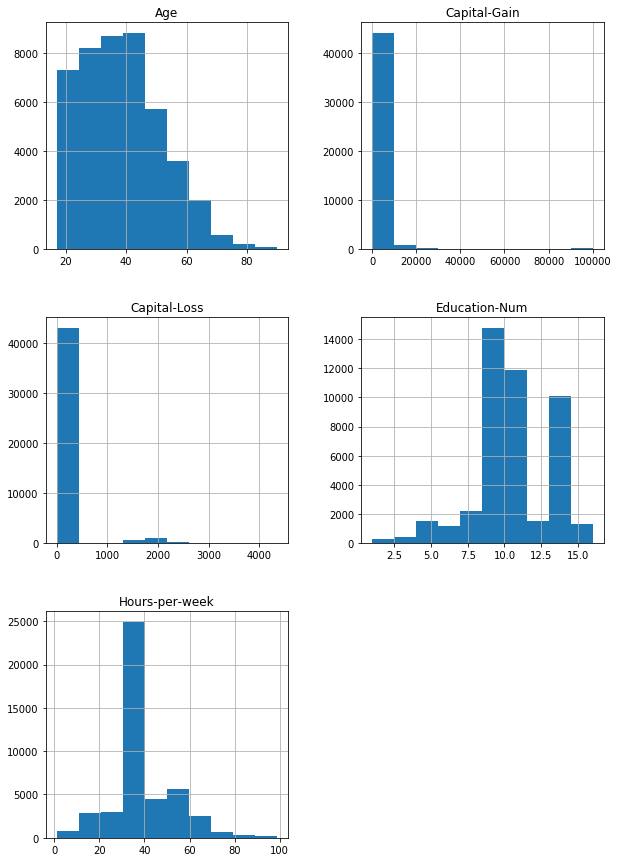

In [40]:
df_cleaned.hist(grid=True, figsize = (10,15))
pl.show()

Hours-per-week has a range going up to 99, which could be a mistake in data collection or represent an unknown value. However, the histogram reveals that the values in the range go up to 99 continuously, making it more likely that these are valid responses rather than mistakes.

The highest number of 99999 in Capital-Gain column looks like a potentially unknown value, especially as there are no values close to it. However, I will not be removing it as I can't confirm this from anywhere.

The histograms also reveal that a significant majority of individuals in the sample do not have any capital gains or losses.

A large majority of individuals report working 40 hours a week which sounds accurate as per cultural norms.

Plotting age, hours-per-week and years of education against income, all look predictive of a higher salary.

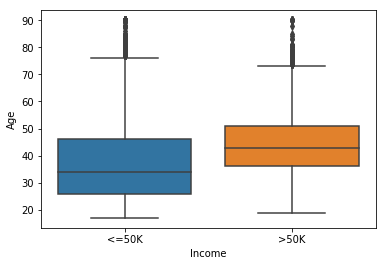

In [41]:
sns.boxplot(x='Income', y='Age', data=df_cleaned)

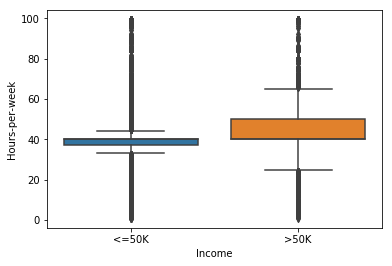

In [42]:
sns.boxplot(x='Income', y='Hours-per-week', data=df_cleaned)

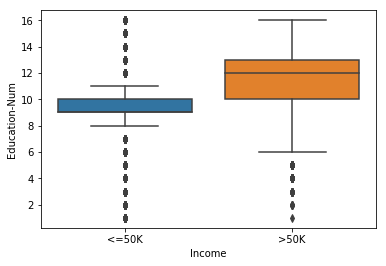

In [43]:
sns.boxplot(x='Income', y='Education-Num', data=df_cleaned)

## Check frequency of categorical variables

In [44]:
pd.crosstab(index=df_cleaned["Capital-Gain"],
                      columns="count")

col_0,count
Capital-Gain,
0,41431
114,8
401,2
594,42
914,10
991,4
1055,31
1086,5
1151,13


Target classes are imbalanced, this will have to be handled before moving onto modelling

In [45]:
pd.crosstab(index=df_cleaned["Workclass"],
                      columns="count")

col_0,count
Workclass,
Federal-gov,1406
Local-gov,3100
Private,33306
Self-emp-inc,1646
Self-emp-not-inc,3796
State-gov,1946
Without-pay,21


Workclass variable will be collapsed into three groups "Public", "Private" and "Self-emp". Without-pay will be dropped due to the low number of occurrences.

In [46]:
# drop rows where Workclass equals Without-pay

df_cleaned = df_cleaned[df_cleaned.Workclass != 'Without-pay']
df_cleaned.shape

(45200, 14)

In [47]:
pd.crosstab(index=df_cleaned["Native-country"],
                      columns="count")

col_0,count
Native-country,
Cambodia,26
Canada,163
China,113
Columbia,82
Cuba,133
Dominican-Republic,97
Ecuador,43
El-Salvador,147
England,119


This variable is also heavily imbalanced with over 91% of the individuals being US-born.

Since I am not interested in the level of detail this variable provides, I will collapse the countries into three groups "US", "Non-US_developed" and "Non-US_emerging", according to MSCI's
market classification.

https://www.msci.com/market-classification

In [48]:
pd.crosstab(index=df_cleaned["Education"],
                      columns="count")

col_0,count
Education,
10th,1223
11th,1618
12th,577
1st-4th,222
5th-6th,449
7th-8th,821
9th,676
Assoc-acdm,1505
Assoc-voc,1959


Education will be collapsed into five groups "Associate", "Bachelors", "Doctorate, "HS-grad, "Masters", and no-HS".

In [49]:
pd.crosstab(index=df_cleaned["Occupation"],
                      columns="count")

col_0,count
Occupation,
Adm-clerical,5537
Armed-Forces,14
Craft-repair,6019
Exec-managerial,5983
Farming-fishing,1472
Handlers-cleaners,2044
Machine-op-inspct,2967
Other-service,4806
Priv-house-serv,232


I will retain the values as they are as I want to explore the role of each occupation in this analysis. However, Armed Forces will be dropped to the low number of occurrences.

In [50]:
df_cleaned = df_cleaned[df_cleaned.Occupation != 'Armed-Forces']
df_cleaned.shape

(45186, 14)

In [51]:
pd.crosstab(index=df_cleaned["Marital-Status"],
                      columns="count")

col_0,count
Marital-Status,
Divorced,6297
Married-AF-spouse,32
Married-civ-spouse,21036
Married-spouse-absent,551
Never-married,14583
Separated,1411
Widowed,1276


These will be collapsed into two groups "Married" and "Unmarried".

In [52]:
pd.crosstab(index=df_cleaned["Relationship"],
                      columns="count")

col_0,count
Relationship,
Husband,18653
Not-in-family,11697
Other-relative,1347
Own-child,6615
Unmarried,4786
Wife,2088


Some of the categories here look similar to those available for Marital-Status and Sex so will likely be showing collinearity. Leaving this variable in as it is for now.

In [53]:
pd.crosstab(index=df_cleaned["Race"],
                      columns="count")

col_0,count
Race,
Amer-Indian-Eskimo,434
Asian-Pac-Islander,1302
Black,4225
Other,353
White,38872


Race is heavily imbalanced with ~87% of the individuals being white

## Bin categorical data

In [0]:
# replace values in Marital-status with married/not married

pd.options.mode.chained_assignment = None
df_binned = df_cleaned.copy()
df_binned.replace(['Divorced', 'Married-AF-spouse', 
              'Married-civ-spouse', 'Married-spouse-absent', 
              'Never-married','Separated','Widowed'],
             ['not married','married','married','married',
              'not married','not married','not married'], inplace = True)

In [55]:
pd.crosstab(index=df_binned["Marital-Status"],
                      columns="count")

col_0,count
Marital-Status,
married,21619
not married,23567


In [0]:
# bin values in Workclass
pd.options.mode.chained_assignment = None
df_binned.replace(['Federal-gov', 'Local-gov', 
              'Private', 'Self-emp-inc', 
              'Self-emp-not-inc','State-gov'],
             ['Public','Public','Private','Self-emp',
              'Self-emp','Public'], inplace = True)

In [57]:
pd.crosstab(index=df_binned["Workclass"],
                      columns="count")

col_0,count
Workclass,
Private,33306
Public,6438
Self-emp,5442


In [0]:
# bin values in Native-country as per https://www.msci.com/market-classification. I'm guessing that 'South' refers to South Korea but can't confirm so marking as unknown

pd.options.mode.chained_assignment = None
df_binned.replace(['Cambodia', 'Canada', 
                  'China', 'Columbia', 
                  'Cuba','Dominican-Republic','Ecuador',
                'El-Salvador', 'England', 'France',
                'Germany', 'Greece', 'Guatemala', 'Haiti',
                  'Holand-Netherlands', 'Honduras', 'Hong',
                  'Hungary', 'India', 'Iran', 'Ireland', 'Italy',
                  'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua',
                  'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines',
                  'Poland', 'Portugal', 'Puerto-Rico',
                  'Scotland', 'South', 'Taiwan', 'Thailand',
                  'Trinadad&Tobago', 'United-States', 'Vietnam',
                  'Yugoslavia'],
                  ['non-US_emerging','non-US_developed','non-US_emerging','non-US_emerging',
                   'non-US_emerging','non-US_emerging','non-US_emerging','non-US_emerging',
                   'non-US_developed', 'non-US_developed', 'non-US_developed', 'non-US_emerging',
                   'non-US_emerging', 'non-US_emerging', 'non-US_developed', 'non-US_emerging',
                   'non-US_developed', 'non-US_emerging', 'non-US_emerging', 'non-US_emerging',
                   'non-US_developed', 'non-US_developed', 'non-US_emerging', 'non-US_developed',
                   'non-US_emerging', 'non-US_emerging', 'non-US_emerging', 'US', 'non-US_emerging',
                   'non-US_emerging', 'non-US_emerging', 'non-US_developed', 'non-US_emerging',
                   'non-US_developed','unknown', 'non-US_emerging','non-US_emerging',
                    'non-US_emerging', 'US', 'non-US_emerging', 'non-US_emerging'], inplace = True)

In [59]:
pd.crosstab(index=df_binned["Native-country"],
                      columns="count")

col_0,count
Native-country,
US,41279
non-US_developed,847
non-US_emerging,2959
unknown,101


In [0]:
pd.options.mode.chained_assignment = None
df_binned.replace(['10th', '11th', 
              '12th', '1st-4th', 
              '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Some-college',
                'Preschool', 'Prof-school'],
             ['noHS','noHS','noHS','noHS', 'noHS', 'noHS', 'noHS', 'Associate', 'Associate', 
            'HS-grad', 'noHS','Associate'], inplace = True)

In [61]:
pd.crosstab(index=df_binned["Education"],
                      columns="count")

col_0,count
Education,
Associate,4248
Bachelors,7569
Doctorate,544
HS-grad,24656
Masters,2512
noHS,5657


# Explore categorical variables

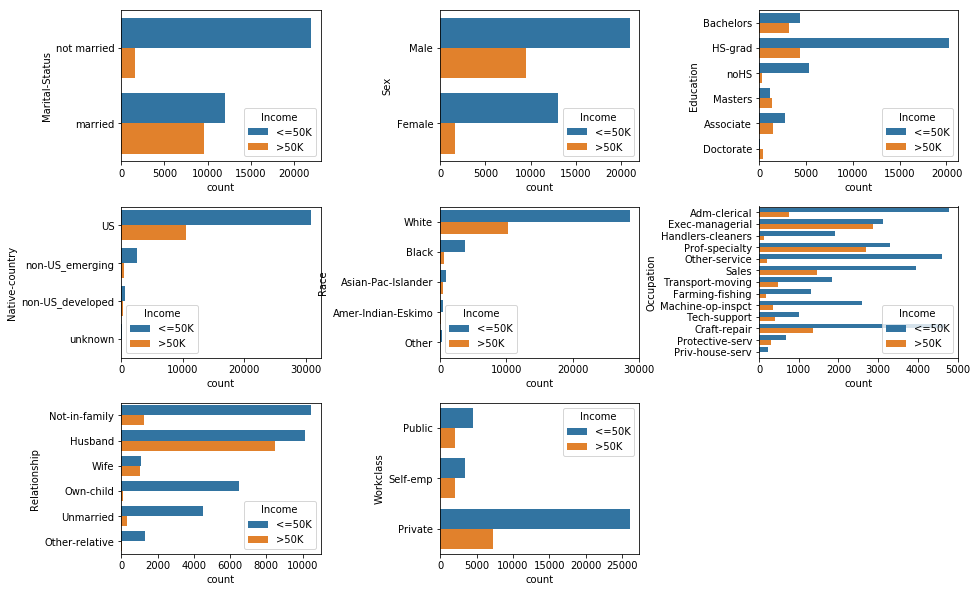

In [65]:
fig, ax = plt.subplots(3,3, figsize=(15,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.6, hspace=0.3)
sns.countplot(y='Marital-Status', hue='Income', data=df_binned, ax=ax[0,0])
sns.countplot(y='Sex', hue='Income', data=df_binned, ax=ax[0,1])
sns.countplot(y='Education', hue='Income', data=df_binned, ax=ax[0,2])
sns.countplot(y='Native-country', hue='Income', data=df_binned, ax=ax[1,0])
sns.countplot(y='Race', hue='Income', data=df_binned, ax=ax[1,1])
sns.countplot(y='Occupation', hue='Income', data=df_binned, ax=ax[1,2])
sns.countplot(y='Relationship', hue='Income', data=df_binned, ax=ax[2,0])
sns.countplot(y='Workclass', hue='Income', data=df_binned, ax=ax[2,1])
fig.delaxes(ax[2,2])
plt.show()

Plotting the categorical variables against Income, Marital-Status, Sex, Occupation, Relationship and Education all appear to show good predictability of income level.

Using box plots to explore differences in income between men and women, it is interesting to see that hours worked per week appear to affect women's income level more than they do for men. Men also see their income increase more as they age than women do.

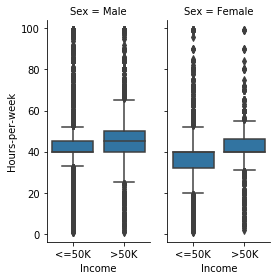

In [72]:
g = sns.FacetGrid(df_binned, col='Sex', height=4, aspect=.5)
g = g.map(sns.boxplot, 'Income', 'Hours-per-week', order=None)
plt.show()

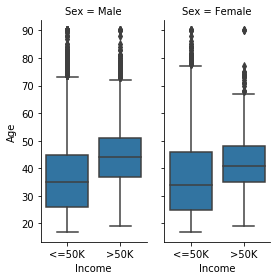

In [74]:
g = sns.FacetGrid(df_binned, col='Sex', height=4, aspect=.5)
g = g.map(sns.boxplot, 'Income', 'Age', order=None)
plt.show()

## Encode categorical variables

In [0]:
pd.options.mode.chained_assignment = None
df_encoded = df_binned.copy()
# Transform target variable Income to 1/0
df_encoded['is_high'] = df_encoded.Income.apply(lambda x: 1 if x == '>50K' else 0)

# Transform Sex to 1/0
df_encoded['is_male'] = df_encoded.Sex.apply(lambda x: 1 if x == 'Male' else 0)
df_encoded['is_married'] = df_encoded['Marital-Status'].apply(lambda x: 1 if x == 'married' else 0)

# Create dummy categories for the rest of the categorical variables and apply drop_first to avoid collinearity
dummies = pd.get_dummies(df_encoded, prefix=['Workclass', 'Education', 'Occupation', 'Relationship', 'Race', 'Native-country'], 
                         columns=['Workclass', 'Education', 'Occupation', 'Relationship', 'Race', 'Native-country'], drop_first=True)


# Copying dummies into the final dataframe
df_final = dummies.copy()

## Relationship Analysis

Now that all categorical variables have been encoded, it is possible to explore how the features in the dataset relate to each other and the target variable.

In [0]:
sns.diverging_palette(200, 10, as_cmap=True)
correlations = dummies.corr()
plt.subplots(figsize=(25,20))
sns.heatmap(correlations)

Unsurprisingly, dummy variables derived from Education and Education-Num show collinearity as years in education correspond to the education level achieved. Apart from a strong and obvious negative correlation between Race_White and Race_Black, the data does not show strong multicollinearity.

The largest positive correlation value is ~0.5 as printed below

In [0]:
c = dummies.corr().abs()

s = c.unstack()
so = s.sort_values()

print (so[-47:-45])

In [0]:
df_final_corr = df_final.corr()['is_high'].drop('is_high').sort_values(ascending=False)
plt.figure(figsize=(11,10))
sns.barplot(x=df_final_corr, y=df_final_corr.index)

Plotting the independent variables against the target variable reveals that features that have the highest positive correlation with high income are being married and male. Years in education, age, hours worked per week and occupation also correlate with a high income which intuitively makes sense and is in line with the visualisations seen earlier. The largest negative correlation is seen with children under 18 living with parents and persons living alone, although the values are not very high.

## Baseline

In [0]:
df_final.is_high.mean()

Baseline for the models is ~76%

## Final Dataframe

I will retain the dataframe as below and run Lasso regularisation for feature selection at the next stage

In [0]:
df_final.head()

In [0]:
df_final.columns

## Next steps

1. Process the data further before by handling the imbalanced classes and scaling numeric variables

2. Split into train and test datasets

3. Aim to build three classification models starting with Lasso regression, followed by KNN and Random Forest

4. Update the dataframe according to specific model requirements, e.g. remove dummy categories and encode as ordinal numbers for Random Forest